<a href="https://colab.research.google.com/github/MadSlingshoter/Artificial-intelligence-for-data-science-/blob/main/Lab3/Lab3-Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#GGE15D'>**Clustering: Kmeans**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import *
from scipy.cluster.hierarchy import dendrogram

from mlxtend.plotting import plot_decision_regions

## **🔸 Datasets**

<font color='#EE15D'> **Note: This assignment contains 4 datasets. Example 1 is the Mall Customers dataset. Examples 2, 3, and 4 are three generated datasets.**

### Example 1

In [2]:
X = pd.read_csv('https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab3/Mall_Customers.csv')
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())


X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


((160, 4), (40, 4))

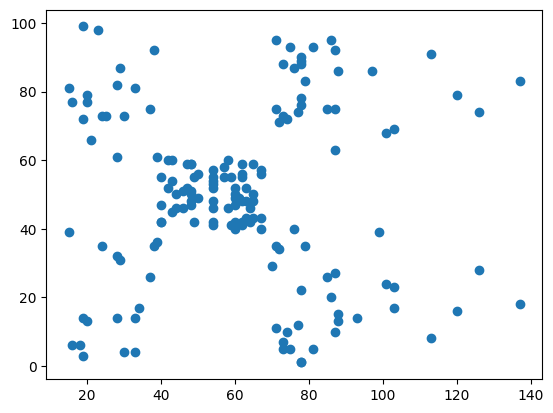

In [3]:
plt.scatter(X_train[:, -2], X_train[:, -1])

### Example 2

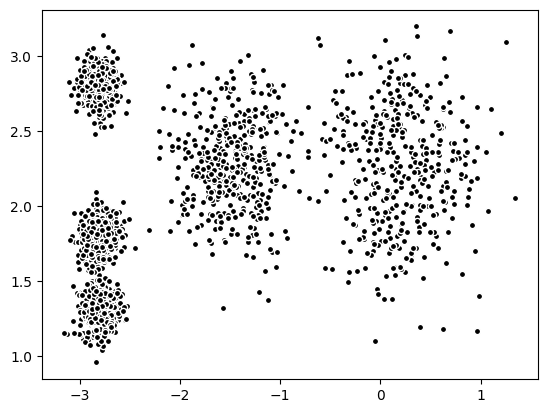

In [4]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X2[:, 0], X2[:, 1], s=20, c='black', edgecolor='white')

### Example 3

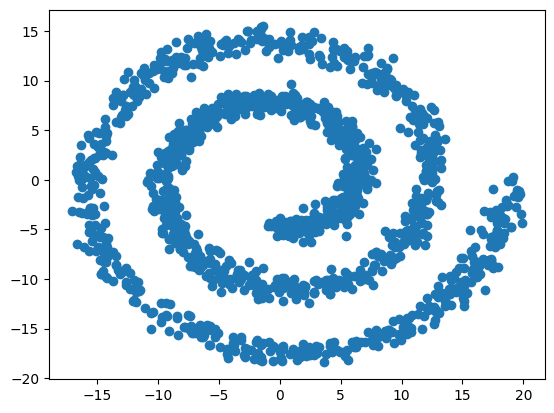

In [5]:
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X3 = np.concatenate((x, y))
X3 += 0.7 * np.random.randn(2, n_samples)
X3 = X3.T

plt.scatter(X3[:, 0], X3[:, 1])

### Example 4

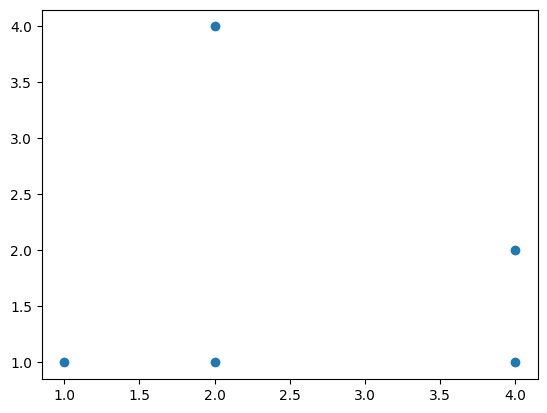

In [6]:
X4 = np.array([[1, 1], [2, 4], [2, 1], [4, 1], [4, 2]])

plt.scatter(X4[:, 0], X4[:, 1])

## **🔸 K-means**

### sklearn

In [7]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

<font color='#EE15D'>**Question1: Import Kmeans, Consider 3 different numbers of clusters: 2, 3, and 5 on X dataset. Finally, visualize the results and compare the plots.**

In [8]:
n = 2  #numbers of clusters
kmeans = KMeans(n_clusters=n)     #complete this code

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

((160,), (2, 2))

In [9]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Xm = Xm.reshape(xx.shape)

Text(0.5, 1.0, 'K-means, n = 2')

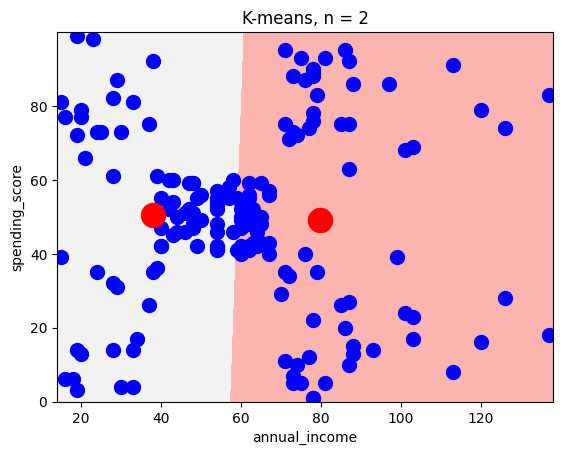

In [10]:
plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])
plt.title('K-means, n = 2')

The three different number of clusters are shown in the plots below. With n = 2 the clustering is not good. There is a large group of data points in the middle that are split through their middle. With n = 3 the clustering is a lot better with distinct areas. However, with n = 5 there are a handful of points that lie on the edges of the areas, but otherwise it is good.

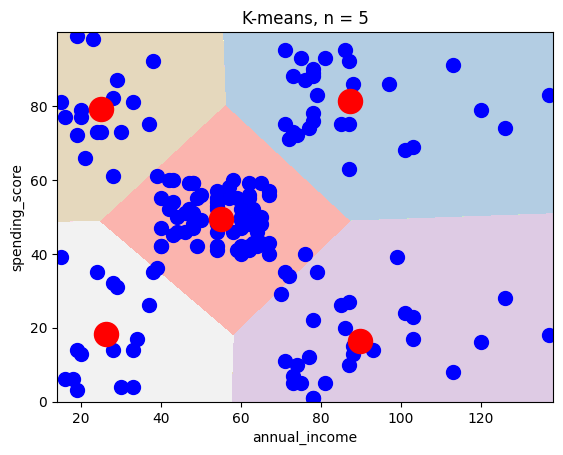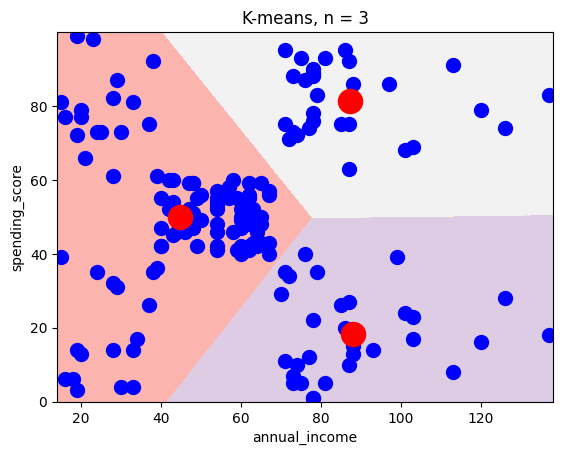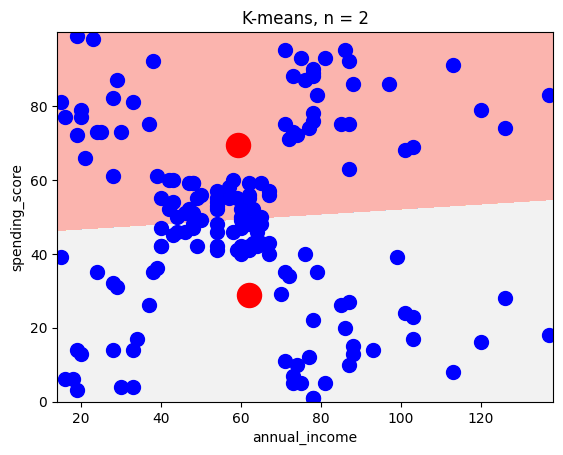

## **🔸 Elbow & Silhouette**

<font color='#EE15D'> **Question2: Elbow: Write code to compute and plot the elbow curve for the X dataset. Your final plot should match the provided output. Determine where the elbow point is.**

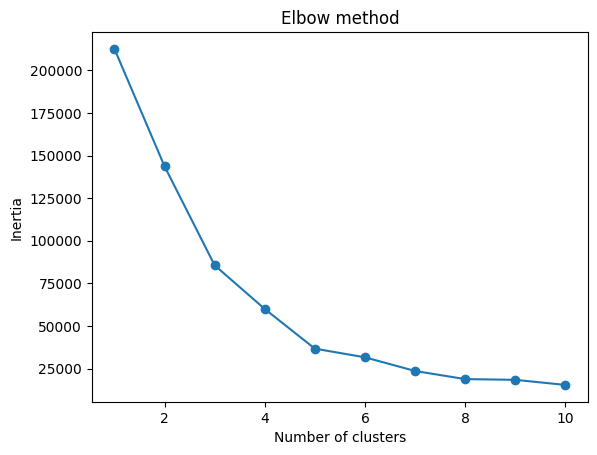

In [11]:
#Do it here
inertias = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow point is possibly at n = 5, but there is no clear elbow point.

### Silhouette score

<font color='#EE15D'> **Question3: Calculate sillhoutte score**

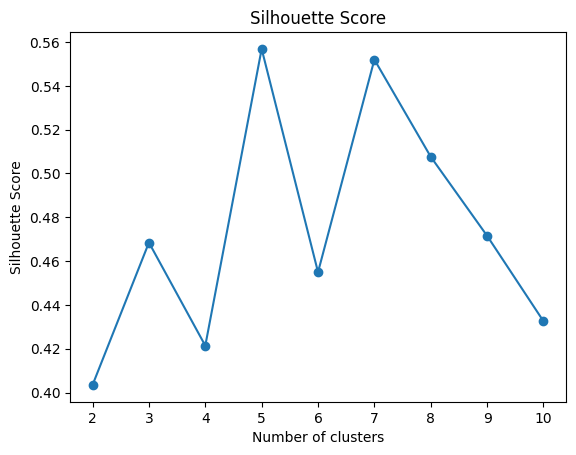

In [12]:
#Do it here
silhouette_vals = []

for n in range(2,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit_predict(X)
    silhouette_vals.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2,11), silhouette_vals, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Number of clusters of n = 5 seems to give the best silhouette score. It varies slightly each time it is run with n = 6 sometimes also having a good value.

## **🔸 Hierarchical Clustering**

### Example 1

<font color='#EE15D'> **Question4: Use AgglomerativeClustering of Sklearn with 5 clusters, fit on X2 data and plot it. You just need to complete agg code line**

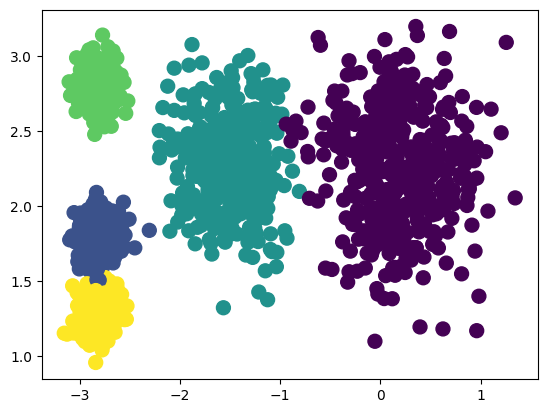

In [13]:
agg = AgglomerativeClustering(n_clusters=5)   #complete this code
agg.fit(X2)

labels = agg.labels_


plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels);

### Example 2

<font color='#EE15D'> **Question5: Apply AgglomerativeClustering on X data with 5 clusters, switch linkage between 'ward', 'single', and 'complete' and compare the plotts. Which is a better method?**

In [14]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

Text(0.5, 1.0, 'Linkage Ward')

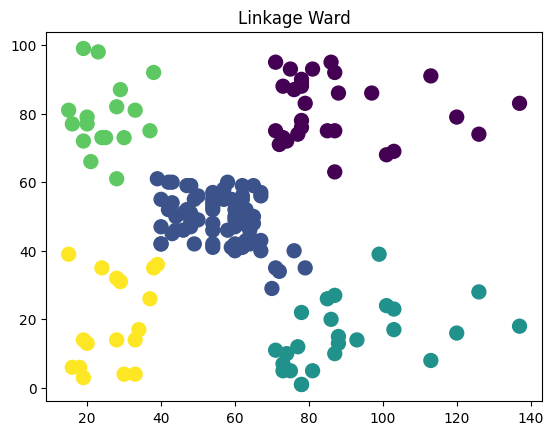

In [15]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')   #complete this code
agg.fit(X)

labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], s=100, c=labels);
plt.title('Linkage Ward')

All three variations are shown below. The 'single' linkage criterion does not give good clustering. Both 'ward' and 'complete' give good clustering with 'complete' being a bit better.

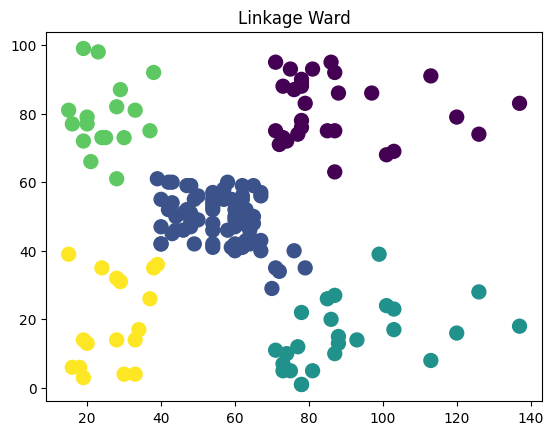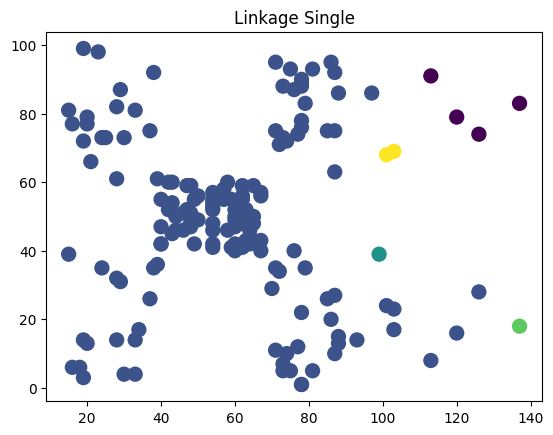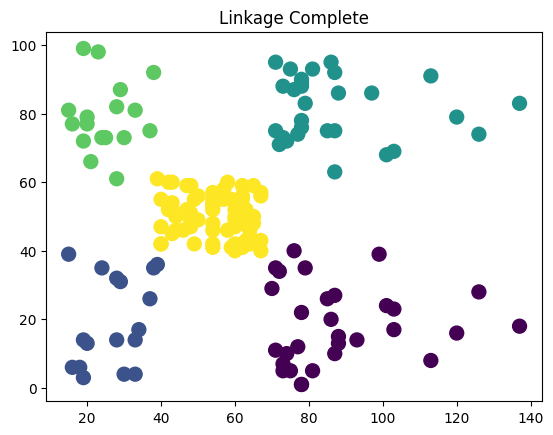

### Example 3

<font color='#EE15D'> **Question6: Apply AgglomerativeClustering on X3 data with 4 clusters, and linkage = 'ward', finally visualize it**

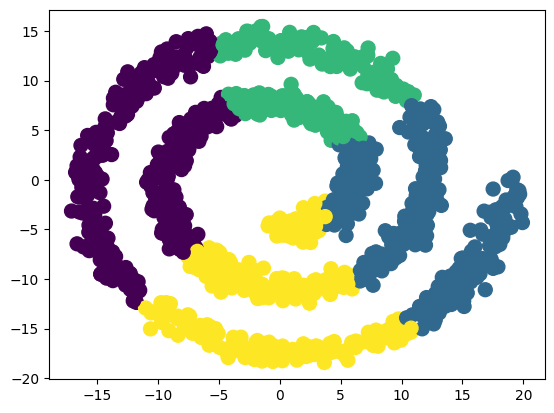

In [16]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')  #complete this code
agg.fit(X3)

labels = agg.labels_


plt.scatter(X3[:, 0], X3[:, 1], s=100, c=labels);

### Dendrogram (Optional, Extra point)

For extra points, you can plot a dendrogram using Agglomerative Clustering on the X4 dataset by applying the function provided in the following link.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

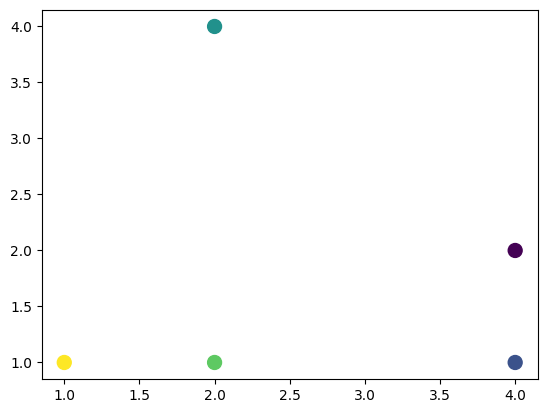

In [17]:
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)  #complete this code
agg = agg.fit(X4)

labels = agg.labels_

plt.scatter(X4[:, 0], X4[:, 1], s=100, c=labels);

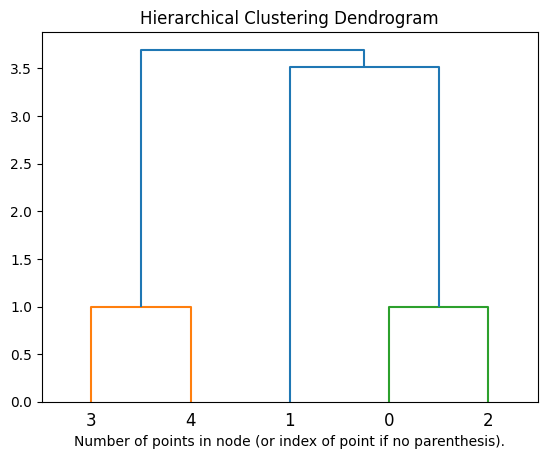

In [18]:
#Do plotting Dendogram here
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()